In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load data set
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#to check null value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

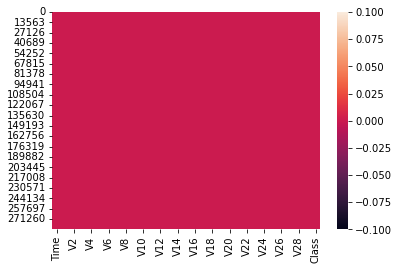

In [4]:
#by visualization null values
sb.heatmap(df.isnull())

In [5]:
#to check how many rows and columns are there in this dataset
df.shape

(284807, 31)

In [6]:
#target variable how many 0's and 1's is there.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
#to check duplicated row
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#to check duplicated row
df.duplicated().sum()

0

In [10]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
#select input and output
X=df.drop('Class',axis=1)#input
Y=df['Class']#output

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
#apply standard scaler on X_train and X_test
from sklearn.preprocessing import StandardScaler
#create object for StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [14]:
X_train.shape,Y_train.shape

((198608, 30), (198608,))

In [15]:
#frst check Y_train  (0 nd 1):how many sample of 0's and 1's
Y_train.value_counts()

0    198260
1       348
Name: Class, dtype: int64

In [16]:
#clearly understand: data is unbalance
#now we have to balance y_train
#use random over sampling means we are converting minority class into mojority class 
#means increase means make a duplicate copy of some records randomaly
#and force minority class converts to majority class

In [17]:
from imblearn.over_sampling import RandomOverSampler
#RandomOverSampler inbuilt class which define in outer class over_Sampling 
#and over_Sampling  class define in inbuilt package imblearn

In [18]:
#create the object of class RandomOverSampler
ros= RandomOverSampler(random_state=1)
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)
#fit_resample() inbuilt method of RandomOverSampler class

In [19]:
X_train1.shape,Y_train1.shape

((396520, 30), (396520,))

In [20]:
Y_train1.value_counts()

0    198260
1    198260
Name: Class, dtype: int64

In [21]:
#check testing data
X_test.shape,Y_test.shape

((85118, 30), (85118,))

In [22]:
Y_test.value_counts()

0    84993
1      125
Name: Class, dtype: int64

In [23]:
#Apply RandomOversampler on testing data
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)
#fit_resample() inbuilt method of RandomOverSampler class

In [24]:
#check 
Y_test1.value_counts()

0    84993
1    84993
Name: Class, dtype: int64

In [25]:
#create a  user defined function
def create_model(model):#user defined fuction
    #model user defined object which hold the object of algorithm
    #first train the model with 70% data
    model.fit(X_train1,Y_train1)
    #then test the model with 30% data
    Y_pred=model.predict(X_test1)
    #generate report
    print(classification_report(Y_test1,Y_pred))
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [26]:
#call the class
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
#1.Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

In [28]:
#create the object of   LogisticRegression class
lr=LogisticRegression(random_state=1)

In [29]:
#call function 
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     84993
           1       0.98      0.89      0.93     84993

    accuracy                           0.93    169986
   macro avg       0.94      0.93      0.93    169986
weighted avg       0.94      0.93      0.93    169986

[[83265  1728]
 [ 9386 75607]]


### here recall score in LogisticRegression is 89% good,but we can do more better.

In [30]:
#2)Now,give data in the next classification algo. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
#create the object DecisionTreeClassifier class with gini index
dt=DecisionTreeClassifier(random_state=1)#by default gini index
#if not mention

In [32]:
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     84993
           1       1.00      0.67      0.80     84993

    accuracy                           0.84    169986
   macro avg       0.88      0.84      0.83    169986
weighted avg       0.88      0.84      0.83    169986

[[84968    25]
 [27802 57191]]


In [33]:
#CHECK INFORMATION GAIN :
dict={'input':X.columns,'Ig':dt.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in descendig value
df1.sort_values('Ig',ascending=False,ignore_index=True)

,input,Ig
0,V14,0.750593
1,V4,0.048959
2,V12,0.027476
3,V8,0.021313
4,V3,0.018836
5,V7,0.017205
6,V20,0.015063
7,V16,0.011824
8,Amount,0.010202
9,V17,0.010169


In [34]:
#But we got less score 0.67 % its good but not excellent , 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter of DecisionTreeClassifier class
#2. min_samples_leaf  : inbuilt parameter of DecisionTreeClassifier class

In [35]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with gini index and 
#use parameter max_depth (to remove overfitting)
"""
for i in range(1,9): #start=1 stop=9-1=8 step=+1
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i) #bydefault gini
    print("max depth : ",i)
    #call function 
    dt1=create_model(dt1)
"""
dt1=DecisionTreeClassifier(random_state=1,max_depth=3) #bydefault gini
#call function 
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     84993
           1       0.94      0.83      0.88     84993

    accuracy                           0.89    169986
   macro avg       0.89      0.89      0.89    169986
weighted avg       0.89      0.89      0.89    169986

[[80515  4478]
 [14826 70167]]


In [36]:
#CHECK INFORMATION GAIN :
dict={'input':X.columns,'Ig':dt1.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in descendig value
df1.sort_values('Ig',ascending=False,ignore_index=True)

,input,Ig
0,V14,0.893717
1,V4,0.039723
2,V8,0.023942
3,V3,0.018385
4,V20,0.015404
5,V12,0.008829
6,V23,0.000000
7,V21,0.000000
8,V22,0.000000
9,Time,0.000000


In [37]:
#2.min_samples_leaf:inbuilt paramater of DecisionTreeClassifier class
#leaf means no child:
#min_samples_leaf >=45 and<=100

In [38]:
#use 2nd pruning technique: mi_samples_leaf inbult parameter of 
#DecisionTreeClasifier class:it is also used to remove overfitting
#leaf mns no child:
#create  object of DecisionTreeClasifier class
"""
for i in range(45,101,1): #i=45 i=47,.....
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    #by default gini index
    print('min_samples_leaf :',i)
    #call function
    dt2=create_model(dt2)
"""

dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
    #by default gini index
print('min_samples_leaf :',45)
    #call function
dt2=create_model(dt2)


min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     84993
           1       1.00      0.77      0.87     84993

    accuracy                           0.88    169986
   macro avg       0.90      0.88      0.88    169986
weighted avg       0.90      0.88      0.88    169986

[[84768   225]
 [19592 65401]]


### `here recall score: 0.83 mns 83% (DTC with gini index)

In [39]:
#DecisionTreeClassifier with Entropy method
#frst ceate an object of DecisionTreeClassifier class
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')
#by default criterion='gini' if not given
#formula: P*log(P)-Q*log(Q)


In [40]:
#call function
dt_entropy=create_model(dt_entropy)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     84993
           1       1.00      0.68      0.81     84993

    accuracy                           0.84    169986
   macro avg       0.88      0.84      0.84    169986
weighted avg       0.88      0.84      0.84    169986

[[84964    29]
 [27060 57933]]


In [41]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with entropy index and 
#use parameter max_depth (to remove overfitting)

"""
for i in range(1,9): #start=1 stop=9-1=8 step=+1
    dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i) #bydefault gini
    print("max depth : ",i)
    #call function 
    dt_entropy=create_model(dt_entropy)
"""
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4) #bydefault gini
print("max depth : ",4)
    #call function 
dt_entropy=create_model(dt_entropy)

max depth :  4
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     84993
           1       0.96      0.86      0.91     84993

    accuracy                           0.91    169986
   macro avg       0.92      0.91      0.91    169986
weighted avg       0.92      0.91      0.91    169986

[[82317  2676]
 [12090 72903]]


In [42]:
#CHECK INFORMATION GAIN :
dict={'input':X.columns,'Ig':dt1.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in descendig value
df1.sort_values('Ig',ascending=False,ignore_index=True)

,input,Ig
0,V14,0.893717
1,V4,0.039723
2,V8,0.023942
3,V3,0.018385
4,V20,0.015404
5,V12,0.008829
6,V23,0.000000
7,V21,0.000000
8,V22,0.000000
9,Time,0.000000


In [43]:
#2.min_samples_leaf:inbuilt paramater of DecisionTreeClassifier class
#leaf means no child:
#min_samples_leaf >=45 and<=100

In [44]:
#use 2nd pruning technique: mi_samples_leaf inbult parameter of 
#DecisionTreeClasifier class:it is also used to remove overfitting
#leaf mns no child:
#create  object of DecisionTreeClasifier class
"""
for i in range(45,101,1): #i=45 i=47,.....
    dt_entropy2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    #by default gini index
    print('min_samples_leaf :',i)
    #call function
    dt_entropy2=create_model(dt_entropy2)
"""
dt_entropy2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=49)
    #by default gini index
print('min_samples_leaf :',49)
    #call function
dt_entropy2=create_model(dt_entropy2)

min_samples_leaf : 49
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     84993
           1       1.00      0.79      0.88     84993

    accuracy                           0.89    169986
   macro avg       0.91      0.89      0.89    169986
weighted avg       0.91      0.89      0.89    169986

[[84773   220]
 [18234 66759]]


### here recall score 86% (DTC with entropy) : in this dataset dtc with entropy is good as compared to gini index.

In [45]:
#Apply Ensembling Technique : -
#There are different types of Ensembling technique
'''
1. Naive Aggregation 
a. Hard Voting      b. Soft voting

2. Bootstrapping
a. Bagging   b. pasting   c.Random Forest Tree

3. Boosting Technique
a. ADA Boost (Adaptor Boosting)  b. Gradient Boosting  c. Extreme Gradient Boosting(XG Boost)

4. Stacking
'''

'\n1. Naive Aggregation \na. Hard Voting      b. Soft voting\n\n2. Bootstrapping\na. Bagging   b. pasting   c.Random Forest Tree\n\n3. Boosting Technique\na. ADA Boost (Adaptor Boosting)  b. Gradient Boosting  c. Extreme Gradient Boosting(XG Boost)\n\n4. Stacking\n'

In [46]:
#apply random forest tree : it is bootstraping ensembling technique
#it is work with bagging classifier bootstaping  ensembling technique
#in random forest tree:train the dataset on multiple decision tree algo

In [47]:
from sklearn.ensemble import RandomForestClassifier
#ensemble means to train given dataset on multiple algorithms

In [48]:
#create the object for  RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=1)
#here n_estimators means take how many no. of decisiontree

In [49]:
#call function 
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     84993
           1       1.00      0.73      0.84     84993

    accuracy                           0.87    169986
   macro avg       0.89      0.87      0.86    169986
weighted avg       0.89      0.87      0.86    169986

[[84991     2]
 [22940 62053]]


In [50]:
"""
for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print('No. of decision tree', i)
    rfc=create_model(rfc)
"""

"\nfor i in range(10,101):\n    rfc=RandomForestClassifier(n_estimators=i,random_state=1)\n    print('No. of decision tree', i)\n    rfc=create_model(rfc)\n"

In [51]:
rfc=RandomForestClassifier(n_estimators=11,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     84993
           1       1.00      0.74      0.85     84993

    accuracy                           0.87    169986
   macro avg       0.90      0.87      0.87    169986
weighted avg       0.90      0.87      0.87    169986

[[84988     5]
 [22243 62750]]


In [52]:
dict={'Input':X.columns,'IG':rfc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
14,V14,0.235162
12,V12,0.189772
4,V4,0.139013
17,V17,0.121534
11,V11,0.061245
2,V2,0.043128
10,V10,0.027380
3,V3,0.020124
21,V21,0.014665
20,V20,0.012699


In [53]:
#apply purning tech max_depth
"""
for i in range (1,9):
    rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=i)
    print('print max depth', i)
    rfc1=create_model(rfc1)
"""

"\nfor i in range (1,9):\n    rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=i)\n    print('print max depth', i)\n    rfc1=create_model(rfc1)\n"

In [54]:
#apply purning tech max_depth 
rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=1)
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     84993
           1       0.99      0.82      0.89     84993

    accuracy                           0.90    169986
   macro avg       0.92      0.90      0.90    169986
weighted avg       0.92      0.90      0.90    169986

[[84034   959]
 [15487 69506]]


In [55]:
dict={'Input':X.columns,'IG':rfc1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False)

,Input,IG
12,V12,0.272727
17,V17,0.181818
4,V4,0.181818
14,V14,0.181818
2,V2,0.090909
11,V11,0.090909
22,V22,0.000000
19,V19,0.000000
20,V20,0.000000
21,V21,0.000000


### here recall score in randomforestclassifier is 82% good,but we can do more better.

In [56]:
#Apply ensemblim technique boosting
#1. frst apply ADA Boost : call inbuilt class:AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [57]:
#create the object of AdaBoostClassifier class:
#ADA BOOOST creates decision stump (mns one root and 2 leaf node)
#leaf node: no any childs
ada=AdaBoostClassifier(n_estimators=5,random_state=1)
#n_estimators mns how many desision stump ,desision stump depend on no.of input
#in case of our dataset,no. of features mns inputs =31
#call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     84993
           1       0.93      0.90      0.91     84993

    accuracy                           0.91    169986
   macro avg       0.91      0.91      0.91    169986
weighted avg       0.91      0.91      0.91    169986

[[79250  5743]
 [ 8813 76180]]


In [58]:
"""
for i in range(1,31):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No. of Decision stump :",i)
    #call function
    ada=create_model(ada)
"""

'\nfor i in range(1,31):\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("No. of Decision stump :",i)\n    #call function\n    ada=create_model(ada)\n'

In [59]:
#check important feature
dict={'Input':X.columns,'IG':ada.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
4,V4,0.4
16,V16,0.2
14,V14,0.2
12,V12,0.2
22,V22,0.0
18,V18,0.0
19,V19,0.0
20,V20,0.0
21,V21,0.0
0,Time,0.0


### Here recall score of Adaboostclassifier is 90% it is  good,but we can do more better.

In [60]:
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling 
#technique 
# GB  : - its create a fully grown tree.this algorithm is focus on 
#short comings 
#short comings means error

In [61]:
#call ibuilt class for Gradient Boosting: GradientBoostingClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [62]:
#create the object of gradientboostclassier class and passing the parameter n_estimators mns how many
#iterations mns how many decisiontree use fit train the model
gbc= GradientBoostingClassifier(n_estimators=30,random_state=1)
#n_estimators>=10 and <=100
#call function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     84993
           1       0.98      0.85      0.91     84993

    accuracy                           0.92    169986
   macro avg       0.93      0.92      0.92    169986
weighted avg       0.93      0.92      0.92    169986

[[83756  1237]
 [12810 72183]]


In [63]:
""""
for i in range(10,101):
    #create the object of gradientboostclassier class
    gbc= GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('No of estimators :',i)
    #call function
    gbc=create_model(gbc)
    
"""

'"\nfor i in range(10,101):\n    #create the object of gradientboostclassier class\n    gbc= GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print(\'No of estimators :\',i)\n    #call function\n    gbc=create_model(gbc)\n    \n'

In [64]:
#check important feature(gradiet boosting)
dict={'Input':X.columns,'IG':gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
14,V14,7.892353e-01
4,V4,6.282420e-02
10,V10,3.259015e-02
20,V20,1.964702e-02
12,V12,1.909816e-02
3,V3,1.506319e-02
8,V8,1.208055e-02
29,Amount,8.654303e-03
17,V17,7.337187e-03
21,V21,6.370259e-03


###   Here recall score of Gradientboostclassifier is 85% it is  good,but we can do more better.

In [65]:
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [66]:
#call inbuilt class: XGBClassifier
#frst tym install xgboost in system
#!pip install xgboost

In [67]:
from xgboost import XGBClassifier
#here  XGBClassifier is a inbuilt class which define in package xgboost

In [68]:
#create object of  XGBClassifier class
xgc= XGBClassifier(n_estimators=10 ,reg_alpha=1,random_state=1)
#reg ms regularization and alpha mns lambda mns hyperparamter
#if reg_alpha=1 ,1 mns true mns automatic handle oulier and overfitting
#call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     84993
           1       1.00      0.77      0.87     84993

    accuracy                           0.88    169986
   macro avg       0.91      0.88      0.88    169986
weighted avg       0.91      0.88      0.88    169986

[[84848   145]
 [19598 65395]]


In [69]:
""" 
for i in range(10,101):
    #create the object of XGBclassier class
    xgc=  XGBClassifier(n_estimators=i,random_state=1)
    print('No of estimators :',i)
    #call function
    xgc=create_model(gbc)
"""

" \nfor i in range(10,101):\n    #create the object of XGBclassier class\n    xgc=  XGBClassifier(n_estimators=i,random_state=1)\n    print('No of estimators :',i)\n    #call function\n    xgc=create_model(gbc)\n"

In [70]:
#check important feature(XGB)
dict={'Input':X.columns,'IG':xgc.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False)

,Input,IG
14,V14,0.550799
4,V4,0.042112
5,V5,0.035230
8,V8,0.033173
12,V12,0.029830
20,V20,0.022941
3,V3,0.022924
29,Amount,0.022777
7,V7,0.019219
17,V17,0.017396


### `Here recall score of XGBClassifier is 77% it is  good,but we can do more better.

In [71]:
#Given data in Support vetcor machine
#1;Linear kernel function of SVM:
#mns suppose data are linear seperatable with the help of straight line
#call inbuilt classfor linear svm: LinearSVC
#SVC mns support vector classifier     

In [72]:
from sklearn.svm import LinearSVC

In [73]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1)#no add any error  mns supoose no outlier
#in our dataset mns it is hard margin

In [74]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     84993
           1       0.98      0.87      0.92     84993

    accuracy                           0.93    169986
   macro avg       0.93      0.93      0.93    169986
weighted avg       0.93      0.93      0.93    169986

[[83375  1618]
 [10773 74220]]


In [75]:
#got recall for 1 : 87% means it is good but not best . 
#suppose outlier in our dataset means model overfitted 
#so reduce the overfit of model or remove outlier from given dataset ,
#add some external error during training error means soft margin
#Means again create the object of class LinearSVC  and passing parameter
#C means error parameter , the value of C can be <=1
svc1=LinearSVC(random_state=1,C=0.9)#soft margin

In [76]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     84993
           1       0.98      0.87      0.92     84993

    accuracy                           0.93    169986
   macro avg       0.93      0.93      0.93    169986
weighted avg       0.93      0.93      0.93    169986

[[83419  1574]
 [10773 74220]]


### Here recall score of SVM is 87% it is good,but we can do more better.

In [77]:
#Apply KNN Algorithm: inbuilt class KNeighborsClassifier which define in outer class neighbors and 
#outer class define in package sklearn
#n_neighbors value(1,3,5,7,9) but always take 5 but if increases score then take value 7,9
from sklearn.neighbors import KNeighborsClassifier

In [78]:
#create the object of  KNeighborsClassifier class and passing some parameter
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [79]:
#call function
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     84993
           1       1.00      0.81      0.89     84993

    accuracy                           0.90    169986
   macro avg       0.92      0.90      0.90    169986
weighted avg       0.92      0.90      0.90    169986

[[84927    66]
 [16219 68774]]


### Here recall score of SVM is 81% it is good,but we can do more better.

In [80]:
#Apply KNN Algorithm: inbuilt class KNeighborsClassifier which define in outer class neighbors and 
#outer class define in package sklearn
#n_neighbors value(1,3,5,7,9) but always take 5 but if increases score then take value 7,9
from sklearn.neighbors import KNeighborsClassifier

In [81]:
#create the object of  KNeighborsClassifier class and passing some parameter
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [ ]:
#call function
knc=create_model(knc)

In [ ]:
#Conclusion from all of the above algorithms ADAboosTClassifier is best the recall score is 90%